Test natijalari: [1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0]
Test ma'lumotlari uchun aniqlik: 0.5909


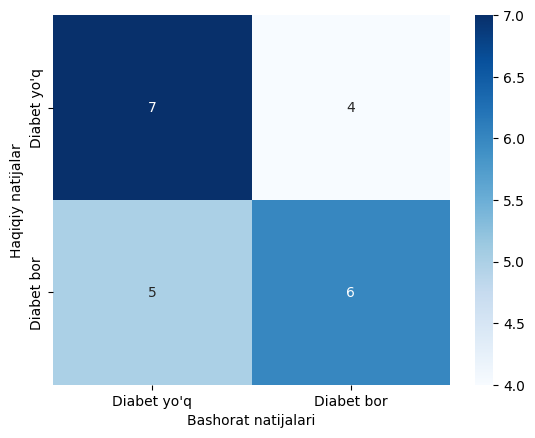

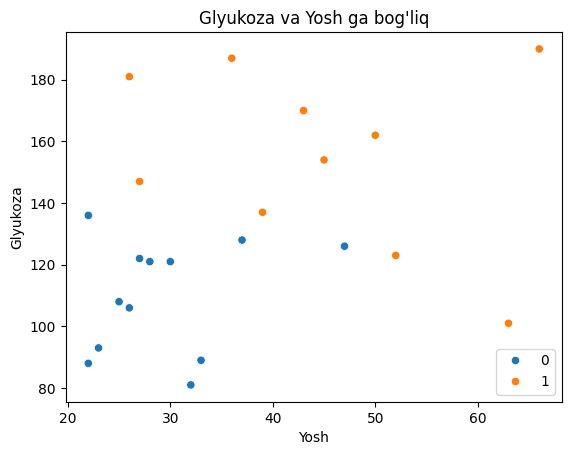

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

data = pd.read_csv('dataset.csv')

# Ma'lumotlarni X va y ga ajratib olamiz
X_train = data.iloc[:, :-1]  # Barcha ustunlar (1 dan boshlab, oxirgi ustunni emas)
y_train = data.iloc[:, -1]  # Natijalar (oxirgi ustun)

# Logistik regressiya modelini yaratish va uchun moslashtirish
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Test ma'lumotlarini yaratish
x_test = pd.DataFrame({
    'Homiladorlik': [1, 1, 3, 6, 4, 1, 3, 0, 8, 1, 7, 0, 1, 6, 2, 9, 9, 10, 2, 5, 1, 1],
    'Glyukoza': [147, 81, 187, 162, 136, 121, 108, 181, 154, 128, 137, 123, 106, 190, 88, 170, 89, 101, 122, 121, 126, 93],
    'Qon Bosimi': [94, 74, 70, 62, 70, 78, 62, 88, 78, 88, 90, 72, 76, 92, 58, 74, 62, 76, 70, 72, 60, 70],
    'Teri Qalinligi': [41, 41, 22, 0, 0, 39, 24, 44, 32, 39, 41, 0, 0, 0, 26, 31, 0, 48, 27, 23, 0, 31],
    'Insulin': [0, 57, 200, 0, 0, 74, 0, 510, 0, 110, 0, 0, 0, 0, 16, 0, 0, 180, 0, 112, 0, 0],
    'Tana Massa Indexsi': [49.3, 46.3, 36.4, 24.3, 31.2, 39, 26, 43.3, 32.4, 36.5, 32, 36.3, 37.5, 35.5, 28.4, 44, 22.5, 32.9, 36.8, 26.2, 30.1, 30.4],
    'Qandli Diabetning Naslchilik Funktsiyasi': [0.358, 1.096, 0.408, 0.178, 1.182, 0.261, 0.223, 0.222, 0.443, 1.057, 0.391, 0.258, 0.197, 0.278, 0.766, 0.403, 0.142, 0.171, 0.34, 0.245, 0.349, 0.315],
    'Yosh': [27, 32, 36, 50, 22, 28, 25, 26, 45, 37, 39, 52, 26, 66, 22, 43, 33, 63, 27, 30, 47, 23],
})

# Test ma'lumotlarini natijalarni bashorat qilish
y_pred = model.predict(x_test)

# Test ma'lumotlarini aniqlash
y_pred = model.predict(x_test)
print("Test natijalari:", y_pred)

# Test ma'lumotlarini aniqlash
y_test = np.array([1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,1,1,1,0,0,1,0])

# Test ma'lumotlarini natijalarni bashorat qilish
y_test_pred = model.predict(x_test)


# Trenirovka va test ma'lumotlari bo'yicha aniqlik (accuracy) ni hisoblaymiz
test_accuracy = accuracy_score(y_test, y_test_pred)

# Konfuziya matricasini o'qish uchun funksiya
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('Haqiqiy natijalar')
    plt.xlabel('Bashorat natijalari')
    plt.show()

# Aniqlik hisoblanganligini ekranga chiqaramiz
print(f'Test ma\'lumotlari uchun aniqlik: {test_accuracy:.4f}')

# Konfuziya matricasini o'qamiz
plot_confusion_matrix(y_test, y_test_pred, classes=['Diabet yo\'q', 'Diabet bor'])

x_test_df = pd.DataFrame(x_test, columns=['Homiladorlik', 'Glyukoza', 'Qon Bosimi', 'Teri Qalinligi', 'Insulin', 'Tana Massa Indexsi', 'Qandli Diabetning Naslchilik Funktsiyasi', 'Yosh'])

# 'Yosh' va 'Glyukoza' ustunlar bo'yicha scatter plot
sns.scatterplot(data=x_test_df, x='Yosh', y='Glyukoza', hue=y_pred)
plt.xlabel('Yosh')
plt.ylabel('Glyukoza')
plt.title('Glyukoza va Yosh ga bog\'liq')
plt.show()
